In [179]:
import numpy as np
import sympy as sp
import pandas as pd
import seaborn as sns

In [180]:
def linearFunction(x: float, slope: float, intercept: float) -> float:
    return slope * x + intercept

<Axes: xlabel='x', ylabel='y'>

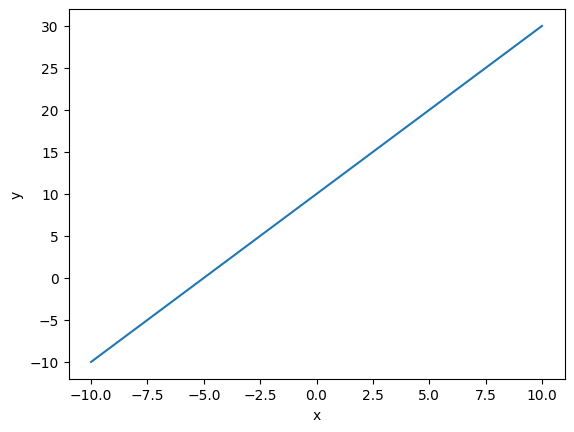

In [181]:
X = np.arange(-10, 11, dtype=np.float32)

df = pd.DataFrame({"x": X, "y": linearFunction(X, 2, 10)})

sns.lineplot(df, x="x", y="y")

In [182]:
# sample two points

t = df.sample(2).to_dict(orient="list")
x_sample, y_sample = t["x"], t["y"]
x_sample, y_sample

([6.0, 1.0], [22.0, 12.0])

In [183]:
# Compute m by Raise/Run

y1, y2, x1, x2, m, b = sp.symbols("y1,y2,x1,x2,m,b")

expr = sp.Eq(m, ((y2 - y1) / (x2 - x1)))
expr

Eq(m, (-y1 + y2)/(-x1 + x2))

In [184]:
# solve for m

m = expr.rhs.subs(
    {
        "y1": y_sample[0],
        "y2": y_sample[1],
        "x1": x_sample[0],
        "x2": x_sample[1],
    }
)

m

2.00000000000000

In [185]:
# compute f(x) by using the Point/Slope Equation

y, x, m, b, yp, xp = sp.symbols("y,x,m,b,yp, xp")


expr = sp.Eq((y - yp), m * (x - xp))

expr

Eq(y - yp, m*(x - xp))

In [186]:
expr = sp.Eq(expr.lhs + yp, expr.rhs + yp)
expr

Eq(y, m*(x - xp) + yp)

In [187]:
expr.subs({"m": 2, "xp": x_sample[0], "yp": y_sample[0]})

Eq(y, 2*x + 10.0)

<Axes: xlabel='x', ylabel='y'>

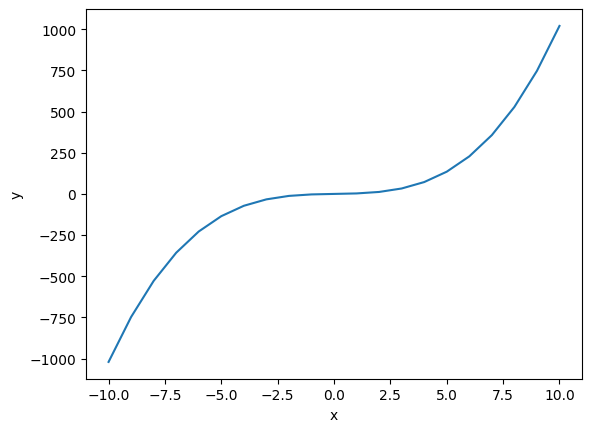

In [188]:
X = np.arange(-10, 11, dtype=np.float32)


def fc(x):
    return x**3 + (2 * x)


df = pd.DataFrame({"x": X, "y": fc(X)})
sns.lineplot(df, x="x", y="y")

In [189]:
# f = lambda x: x**3 + (2*x)
x = sp.symbols("x")
f = sp.Function("f")

expr = sp.Eq(f(x), x**3 + (2 * x))
expr

Eq(f(x), x**3 + 2*x)

In [190]:
derivate = sp.Eq(sp.diff(expr.lhs, x), sp.diff(expr.rhs, x))
derivate

Eq(Derivative(f(x), x), 3*x**2 + 2)

In [191]:
p1 = 2.5, fc(2.5)
p1_inc = 2.5000001, fc(2.5000001)

m_at_p1 = (p1_inc[1] - p1[1]) / (p1_inc[0] - p1[0])
m_at_p1

20.75000075606188

In [192]:
derivate.rhs.subs({x: 2.5})

20.7500000000000

In [193]:
p1 = 8, fc(8)
p1_inc = 8.000001, fc(8.000001)

m_at_p1 = (p1_inc[1] - p1[1]) / (p1_inc[0] - p1[0])
m_at_p1

194.00002398437007

In [194]:
derivate.rhs.subs({x: 8.0})

194.000000000000